In [2]:
!pip install keras-tuner --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import keras_tuner as kt

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(28 * 28,)))
    model.add(layers.Dense(
        units=hp.Int('units', min_value=64, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=regularizers.l2(hp.Choice('l2', [0.001, 0.01, 0.0001]))
    ))
    model.add(layers.Dropout(hp.Choice('dropout', [0.2, 0.3, 0.4])))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', [0.001, 0.01, 0.0001])
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=15,
    factor=3,
    directory='my_dir',
    project_name='fashion_mnist'
)

tuner.search(x_train, y_train, epochs=15, validation_split=0.2, batch_size=64)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Найкраща точність на тестових даних: {test_acc:.2f}')


Trial 30 Complete [00h 01m 04s]
val_accuracy: 0.8178333044052124

Best val_accuracy So Far: 0.8872500061988831
Total elapsed time: 00h 14m 51s
Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7491 - loss: 0.7512 - val_accuracy: 0.8478 - val_loss: 0.4607
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8486 - loss: 0.4574 - val_accuracy: 0.8639 - val_loss: 0.4130
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8625 - loss: 0.4189 - val_accuracy: 0.8736 - val_loss: 0.3972
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8733 - loss: 0.3946 - val_accuracy: 0.8691 - val_loss: 0.3988
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8797 - loss: 0.3760 - val_accuracy: 0.8699 - val_loss: 0.4062
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8798 - loss: 0.3720 - val_accuracy: 0.8755 - val_loss: 0.3950
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8841 - loss: 0.3661 -

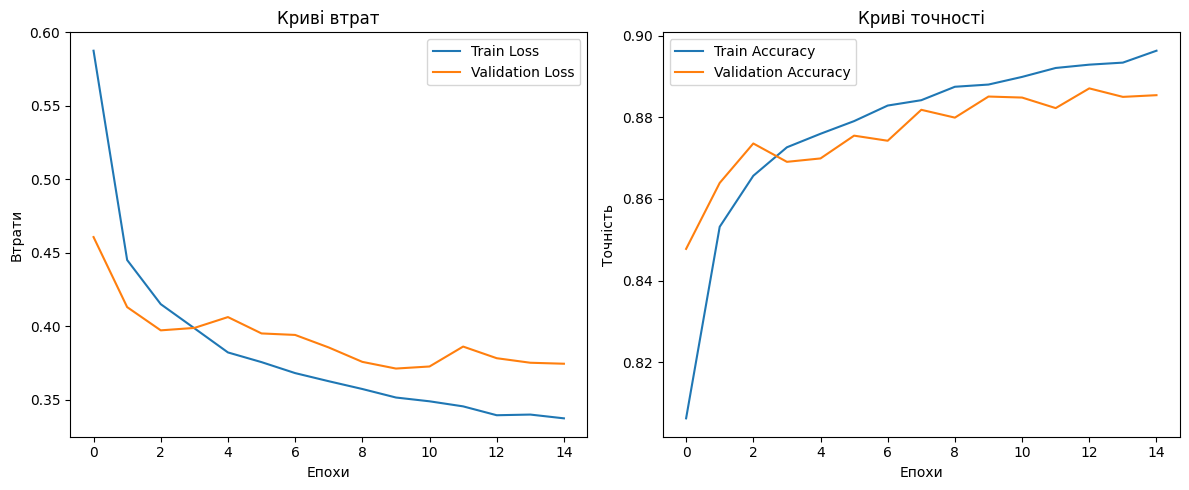

In [4]:
def plot_learning_curves(history):
    plt.figure(figsize=(12, 5))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Криві втрат')
    plt.xlabel('Епохи')
    plt.ylabel('Втрати')
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Криві точності')
    plt.xlabel('Епохи')
    plt.ylabel('Точність')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_learning_curves(history)
